In [ ]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


local
local
local


In [ ]:
def run_one(fast_mode, seed):
    runner = pack_ga.InitializerRandomJiggled(seed=seed)
    N_trees = 40
    N_individuals = 1000
    if fast_mode:
        N_individuals = 10
        runner.jiggler.n_rounds = 1
        runner.jiggler.duration_compact = 10.
        runner.jiggler.plot_interval = 0.001
    population = runner.initialize_population(N_individuals, N_trees)
    sol = population.configuration()
    sol.snap()
    best_id = np.argmin(pack_cost.AreaCost().compute_cost(sol)[0].get())
    xyt = sol.xyt[best_id].get()
    h = sol.h[best_id].get()
    tree_list = kgs.TreeList()
    tree_list.xyt = runner.best_xyt
    pack_vis.visualize_tree_list(tree_list)
    plt.title(f'Seed: {seed}, Size: {runner.h:.4f}')
    plt.pause(0.001)

stop final relax at some point


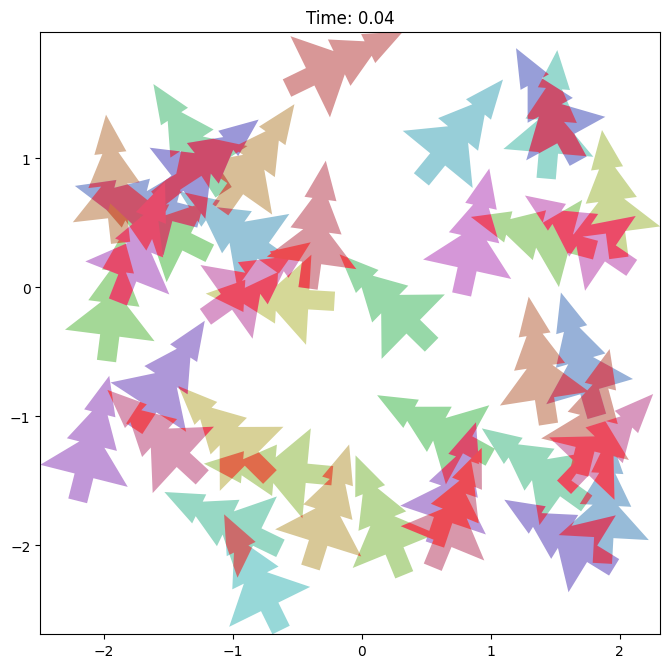

In [ ]:
for seed in [1,2]:
    run_one(True, seed,)